In [1]:
import torch

In [2]:
import numpy

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
import torch.nn as nn

In [6]:
x =torch.linspace(1,50,50).reshape(-1,1)

In [8]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [9]:
y = 2*x + e

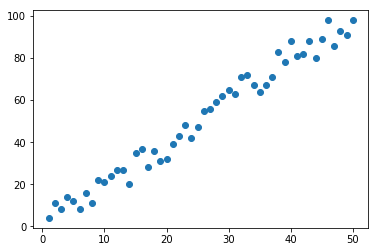

In [10]:
plt.scatter(x.numpy(),y.numpy())

In [11]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [21]:
class Model(nn.Module):
    
    def __init__(self,in_features,out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred


In [23]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [24]:
for name, param in model.named_parameters():
    print (name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [26]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [27]:
x1 =torch.linspace(1,50,50).reshape(-1,1)

In [28]:
criterion = nn.MSELoss()

In [33]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)

In [34]:
epochs = 50
losses = []

for i in range(epochs):
    i = i+1
    y_pred = model.forward(x1)
    loss = criterion(y_pred,y)
    losses.append(loss)
    print ('epoch:'+str(i))
    print(loss.item())
    print(model.linear.weight.item())
    print(model.linear.bias.item())
    
    optimizer.zero_grad
    
    loss.backward()
    optimizer.step()
    

epoch:1
2317.91162109375
0.296599805355072
1.7846211194992065
epoch:2
2431.940673828125
0.2565026879310608
1.7843215465545654
epoch:3
1771.3131103515625
0.5041679739952087
1.792556881904602
epoch:4
770.6376342773438
0.9970296025276184
1.8080624341964722
epoch:5
88.23217010498047
1.6503840684890747
1.8283215761184692
epoch:6
173.03286743164062
2.351947069168091
1.849998116493225
epoch:7
969.2516479492188
2.981149911880493
1.8695096969604492
epoch:8
1953.077392578125
3.429858684539795
1.8836435079574585
epoch:9
2477.278564453125
3.6209583282470703
1.890108346939087
epoch:10
2196.996337890625
3.52160382270813
1.8879282474517822
epoch:11
1296.621337890625
3.1488654613494873
1.8776103258132935
epoch:12
368.4864501953125
2.5667951107025146
1.8610577583312988
epoch:13
23.186365127563477
1.875418782234192
1.8412423133850098
epoch:14
487.8849182128906
1.1935466527938843
1.821694016456604
epoch:15
1456.8692626953125
0.6383559703826904
1.8058942556381226
epoch:16
2292.6708984375
0.305253475904464

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('/media/reza/ResearchDrive/Courses/Course_PyTorch/PYTORCH_NOTEBOOKS/Data/iris.csv')

In [39]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [40]:
df.shape

(150, 5)

In [41]:
features = df.drop('target',axis=1).values

In [42]:
label = df['target'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=33)

In [47]:
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)

In [48]:
y_train = torch.LongTensor(y_train).reshape(-1,1)

In [49]:
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [50]:
from torch.utils.data import TensorDataset, DataLoader

In [51]:
data =  df.drop('target',axis=1).values
labels = df['target'].values

In [53]:
iris = TensorDataset(torch.FloatTensor(data), torch.LongTensor(labels))

In [55]:
iris_loader = DataLoader(iris,batch_size=50, shuffle=True)

In [56]:
for batch in iris_loader:
    print(batch)

[tensor([[5.5000, 4.2000, 1.4000, 0.2000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [5.6000, 2.5000, 3.9000, 